In [28]:
import pandas as pd
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit
from IPython.core.pylabtools import figsize

# *Small Data*
## Ciência de Dados com ênfase em Business Intelligence
## Tópicos Especiais
### Prof. Gabriel Mendonça, M.Sc.

*************

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRGTjEK1uEK9wpxqxMts9Fs4mp1EYHgH_r7lUClP2FDpOHY9T6D" width="500">

*************

# Big x Small Data

*************

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR9cOYdQ1zbMFsCeCL88JYgzSSKzIyNAkCgJUI_SLRC5O7qxtIV" width="500">

*************

### Big Data
- Grande volume de dados (milhões de amostras)
- Algoritmos *simples*
- Grande preocupação com eficiência
- Análise em (quase) tempo real
- Caixas pretas

### *Small* Data
- Poucos dados (dezenas, centenas)
- Algoritmos mais espertos
- Eficiência não é problema
- Análise "histórica"
- "Caixa branca"

![title](img/titulo.png)

# Conceitos
## Evento

> "In probability theory, an event is a set of outcomes of an experiment (a subset of the sample space) to which a probability is assigned."

> Leon-Garcia, Alberto (2008). Probability, statistics and random processes for electrical engineering. Upper Saddle River, NJ: Pearson.

## Variável Aleatória
> "In probability and statistics, a random variable is described informally as a variable whose values depend on outcomes of a random phenomenon (event)."

> Blitzstein, Joe; Hwang, Jessica (2014). Introduction to Probability. CRC Press. ISBN 9781466575592.

### Discreta

![dice](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/6sided_dice.jpg/400px-6sided_dice.jpg)

******

### Contínua
![real_number](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Real_number_line.svg/689px-Real_number_line.svg.png)

## Distribuição
Atribui probabilidades de ocorrência aos possíveis valores de uma variável aleatória.

- Discreta
  - *Probability Mass Function* (PMF)

- Contínua
  - *Probability Density Function* (PDF)

#### Dado de 6 faces
$Pr[X = 1] = Pr[X = 2] = Pr[X = 3] = Pr[X = 4] = Pr[X = 5] = Pr[X = 6] = \frac{1}{6}$

$Pr[X \leq 3] = \frac{3}{6} = \frac{1}{2}$

# Problema
Você joga uma moeda 4 vezes e tira 4 caras. Qual a chance de isso acontecer?

In [88]:
0.5**4

0.0625

Como calcular a probabilidade de tirar cara?

In [103]:
import numpy as np

In [104]:
np.random.binomial?

In [110]:
N = np.random.binomial(4, p=0.7, size=1000)

In [109]:
np.mean(N == 4)

1.0

In [107]:
np.mean(N == 4)

0.062

In [111]:
np.mean(N == 4)

0.231

# Inferência Bayesiana

> **"Bayesian inference is simply updating your beliefs after considering new evidence."**

*Probabilistic Programming and Bayesian Methods for Hackers*, Cam Davidson-Pilon

***

## Conceitos

### Amostra

> O que eu observo, meço, coleto

### Parâmetro

> O que eu quero prever, inferir, estimar

## *Likelihood* (Verossimilhança)

> Probabilidade (chance) de sua **amostra** $X$ ser igual a um determinado valor **dado** um certo **parâmetro** $\theta$

\begin{equation*}
Pr(X = x \mid \theta)
\end{equation*}

- Obtido a partir dos meus dados
- Para uma moeda:

\begin{equation*}
Pr(\text{"Cara"} \mid p = 0,5) = 0,5
\end{equation*}

## *Prior* (Probabilidade *a priori*)

> Probabilidade (chance) de seu **parâmetro** $\theta$ ser igual a um determinado valor

\begin{equation*}
Pr(\theta)
\end{equation*}

- **Conhecimento prévio sobre o problema**
- Para uma moeda:

\begin{equation*}
Pr(p = 0,5) = 1
\end{equation*}

## *Posterior* (Probabilidade *a posteriori*)

> Probabilidade (chance) de seu **parâmetro** $\theta$ ser igual a um determinado valor **dada** uma amostra $X$

\begin{equation*}
Pr(\theta \mid X = x)
\end{equation*}

- Representa minha inferência, minha previsão

## Teorema de Bayes

\begin{equation*}
Pr(A \mid B) = \frac{Pr(B \mid A) \cdot Pr(A)}{Pr(B)}
\end{equation*}

> Permite calcular a *posterior* a partir da *likelihood* e da *prior*

\begin{equation*}
Pr(\theta \mid X = x) = \frac{Pr(X = x \mid \theta) \cdot Pr(\theta)}{\Pr(X = x)}
\end{equation*}

- Podemos inferir algo a partir das **amostras** e de nosso **conhecimento prévio**
- Para uma moeda:

\begin{equation*}
Pr(p = 0,5 \mid \text{"Cara"}) = \frac{Pr(\text{"Cara"} \mid p=0,5) \cdot Pr(p=0,5)}{Pr(\text{"Cara"})}
\end{equation*}

[Desafio](#Desafio)

# Problema (revisado)
Você joga uma moeda 4 vezes e tira 4 caras. Qual a chance de isso acontecer?

Como calcular a probabilidade de tirar cara?

# Exemplo
## Recursos Humanos
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [29]:
cols = ['Age', 'Attrition', 'Gender', 'MaritalStatus', 'OverTime', 'MonthlyIncome']
rh = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', usecols=cols)
rh.head()

,Age,Attrition,Gender,MaritalStatus,MonthlyIncome,OverTime
0,41,Yes,Female,Single,5993,Yes
1,49,No,Male,Married,5130,No
2,37,Yes,Male,Single,2090,Yes
3,33,No,Female,Married,2909,Yes
4,27,No,Male,Married,3468,No


In [30]:
rh.columns

Index(['Age', 'Attrition', 'Gender', 'MaritalStatus', 'MonthlyIncome',
       'OverTime'],
      dtype='object')

# Por que nossos funcionários pedem demissão?
# O que podemos fazer para entender?

*************

<img src=https://storage.needpix.com/rsynced_images/question-mark-1751308_1280.png width="250">

*************


## Limpando os dados

#### 1 - Convertendo para bool

In [31]:
rh = rh.replace({'Yes': True, 'No': False})
rh.head()

,Age,Attrition,Gender,MaritalStatus,MonthlyIncome,OverTime
0,41,True,Female,Single,5993,True
1,49,False,Male,Married,5130,False
2,37,True,Male,Single,2090,True
3,33,False,Female,Married,2909,True
4,27,False,Male,Married,3468,False


In [32]:
rh['Married'] = rh['MaritalStatus'] == 'Married'
rh.head()

,Age,Attrition,Gender,MaritalStatus,MonthlyIncome,OverTime,Married
0,41,True,Female,Single,5993,True,False
1,49,False,Male,Married,5130,False,True
2,37,True,Male,Single,2090,True,False
3,33,False,Female,Married,2909,True,True
4,27,False,Male,Married,3468,False,True


In [33]:
rh['Female'] = rh['Gender'] == 'Female'
rh.head()

,Age,Attrition,Gender,MaritalStatus,MonthlyIncome,OverTime,Married,Female
0,41,True,Female,Single,5993,True,False,True
1,49,False,Male,Married,5130,False,True,False
2,37,True,Male,Single,2090,True,False,False
3,33,False,Female,Married,2909,True,True,True
4,27,False,Male,Married,3468,False,True,False


In [34]:
rh.describe(include='all')

,Age,Attrition,Gender,MaritalStatus,MonthlyIncome,OverTime,Married,Female
count,1470.000000,1470,1470,1470,1470.000000,1470,1470,1470
unique,NaN,2,2,3,NaN,2,2,2
top,NaN,False,Male,Married,NaN,False,False,False
freq,NaN,1233,882,673,NaN,1054,797,882
mean,36.923810,NaN,NaN,NaN,6502.931293,NaN,NaN,NaN
std,9.135373,NaN,NaN,NaN,4707.956783,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,1009.000000,NaN,NaN,NaN
25%,30.000000,NaN,NaN,NaN,2911.000000,NaN,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4919.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN,8379.000000,NaN,NaN,NaN


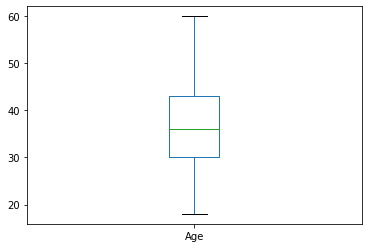

In [35]:
rh['Age'].plot(kind='box')

# 2 - Removendo valores nulos (vazios)

In [36]:
rh.isnull().sum()

Age              0
Attrition        0
Gender           0
MaritalStatus    0
MonthlyIncome    0
OverTime         0
Married          0
Female           0
dtype: int64

Felizmente, não há valores nulos.

## Procurando relações entre as variáveis

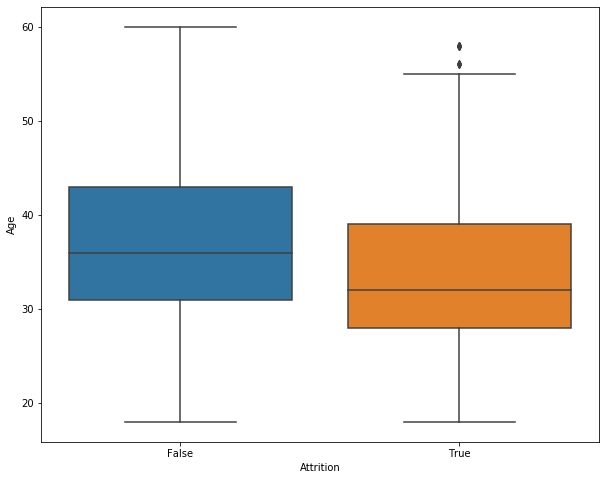

In [37]:
figsize(10, 8)
sns.boxplot(data=rh, x='Attrition', y='Age')

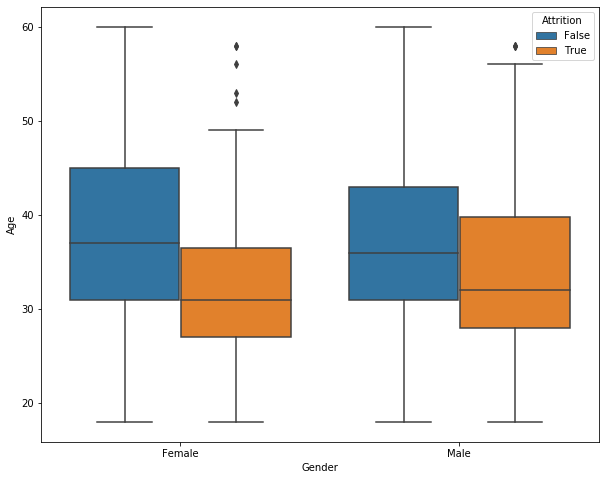

In [38]:
figsize(10, 8)
sns.boxplot(data=rh, x='Gender', y='Age', hue='Attrition')

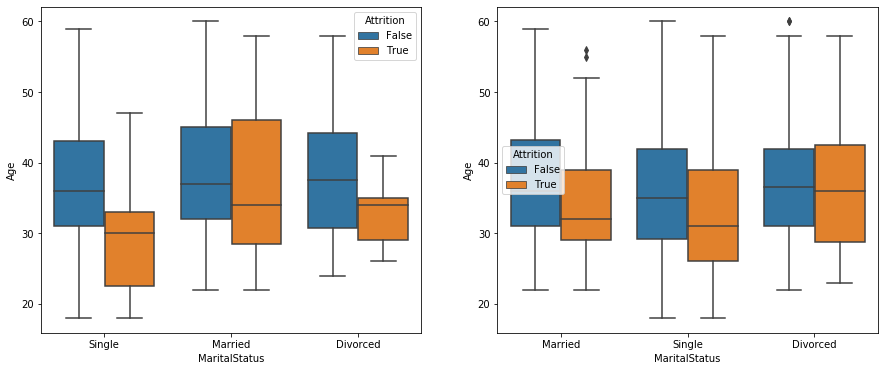

In [47]:
figsize(15, 6)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=rh[rh['Female']], x='MaritalStatus', y='Age', hue='Attrition', ax=ax1)
sns.boxplot(data=rh[~rh['Female']], x='MaritalStatus', y='Age', hue='Attrition', ax=ax2)

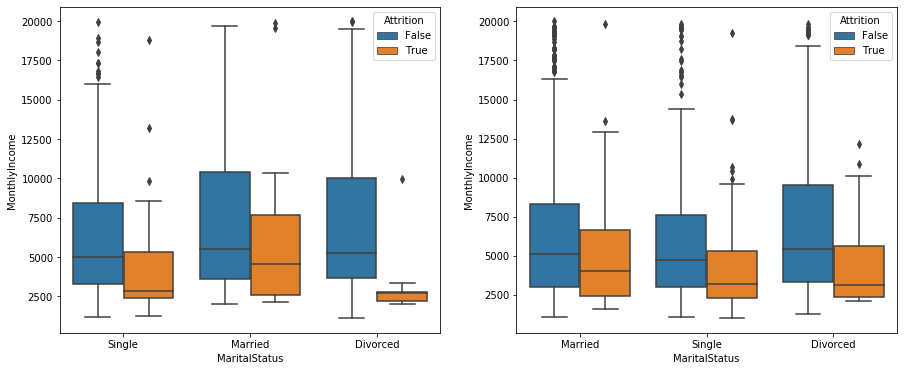

In [49]:
figsize(15, 6)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=rh[rh['Female']], x='MaritalStatus', y='MonthlyIncome', hue='Attrition', ax=ax1)
sns.boxplot(data=rh[~rh['Female']], x='MaritalStatus', y='MonthlyIncome', hue='Attrition', ax=ax2)

In [53]:
filtro_mulheres = rh['Gender'] == 'Female'
filtro_mulheres.head()

0     True
1    False
2    False
3     True
4    False
Name: Gender, dtype: bool

In [52]:
filtro_mulheres.sum()

588

In [54]:
filtro_divorciados = rh['MaritalStatus'] == 'Divorced'
filtro_divorciados.head()

0    False
1    False
2    False
3    False
4    False
Name: MaritalStatus, dtype: bool

In [55]:
filtro_divorciados.sum()

327

In [58]:
filtro_mulheres_divorciadas = filtro_mulheres & filtro_divorciados
filtro_mulheres_divorciadas.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [59]:
filtro_mulheres_divorciadas.sum()

117

In [61]:
filtro_demissao = rh['Attrition']

In [62]:
filtro_demissao.head()

0     True
1    False
2     True
3    False
4    False
Name: Attrition, dtype: bool

In [63]:
filtro_mulheres_divorciadas_demissao = filtro_mulheres & \
                                       filtro_divorciados & \
                                       filtro_demissao
filtro_mulheres_divorciadas_demissao.sum()

9

In [66]:
rh.groupby(['Gender', 'MaritalStatus', 'Attrition']).median()

Age  MonthlyIncome  OverTime  Married  Female
Gender MaritalStatus Attrition                                                
Female Divorced      False      37.5         5233.0       0.0      0.0     1.0
                     True       34.0         2741.0       1.0      0.0     1.0
       Married       False      37.0         5488.0       0.0      1.0     1.0
                     True       34.0         4559.0       0.0      1.0     1.0
       Single        False      36.0         5022.5       0.0      0.0     1.0
                     True       30.0         2851.0       1.0      0.0     1.0
Male   Divorced      False      36.5         5435.0       0.0      0.0     0.0
                     True       36.0         3101.0       0.5      0.0     0.0
       Married       False      36.0         5128.0       0.0      1.0     0.0
                     True       32.0         4031.0       1.0      1.0     0.0
       Single        False      35.0         4702.5       0.0      0.0     0.0
                     True       31.0         3172.0       1.0      0.0     0.0

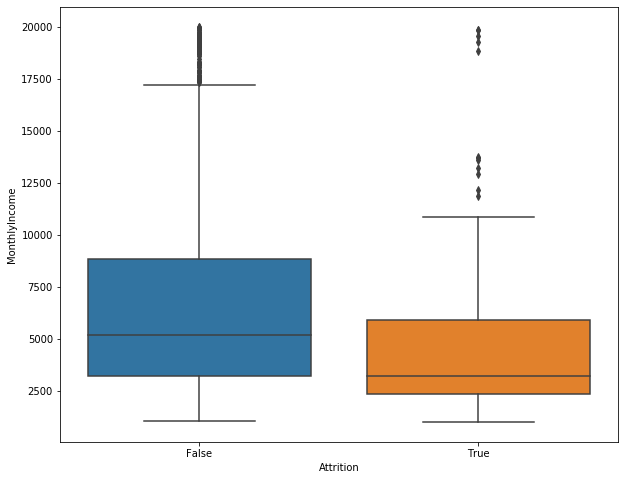

In [39]:
figsize(10, 8)
sns.boxplot(data=rh, x='Attrition', y='MonthlyIncome')

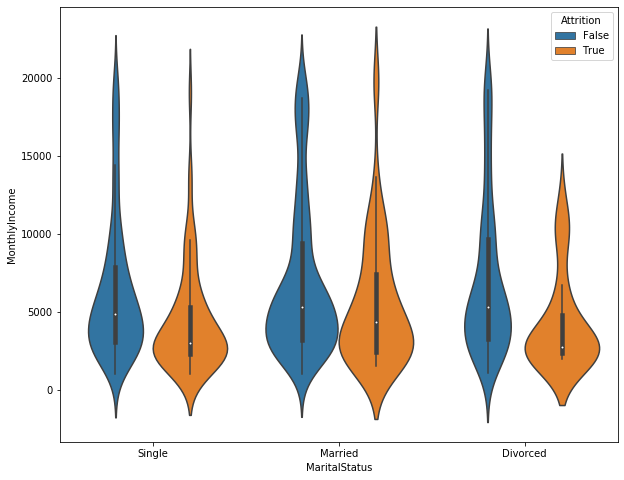

In [42]:
figsize(10, 8)
sns.violinplot(data=rh, x='MaritalStatus', y='MonthlyIncome', hue='Attrition')

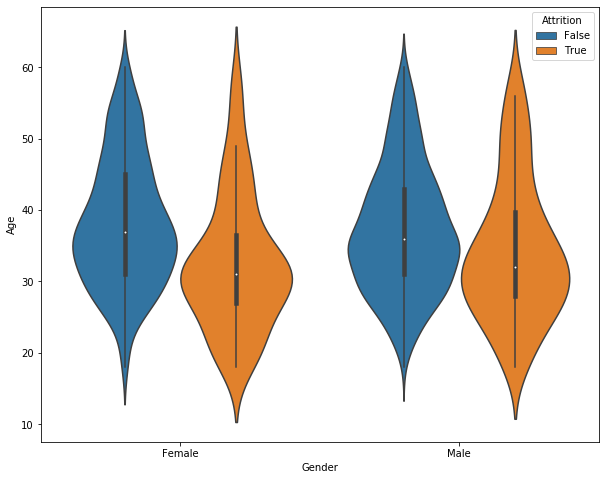

In [43]:
figsize(10, 8)
sns.violinplot(data=rh, x='Gender', y='Age', hue='Attrition')

### Gráfico de correlação

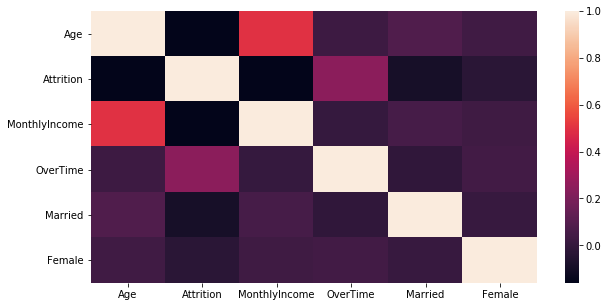

In [67]:
figsize(10, 5)
corr = rh.corr()
sns.heatmap(corr)

# Será que funcionários casados têm mais chances de deixar o emprego?

Antes de tudo, como podemos fazer para medir a probabilidade de um funcionário pedir demissão?

1- Usando a média

In [68]:
rh['Attrition'].mean()

0.16122448979591836

2- Estimando com o Teorema de Bayes

In [69]:
with pm.Model() as model:
    p = pm.Uniform('p', 0, 1)
    obs = pm.Bernoulli("obs", p, observed=rh['Attrition'])
    trace = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████████████████████████████████| 12000/12000 [00:13<00:00, 868.40draws/s]


In [70]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.162,0.01,0.144,0.18,0.0,0.0,4241.0,4241.0,4240.0,7074.0,1.0


In [72]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.162,0.01,0.144,0.18,0.0,0.0,4241.0,4241.0,4240.0,7074.0,1.0


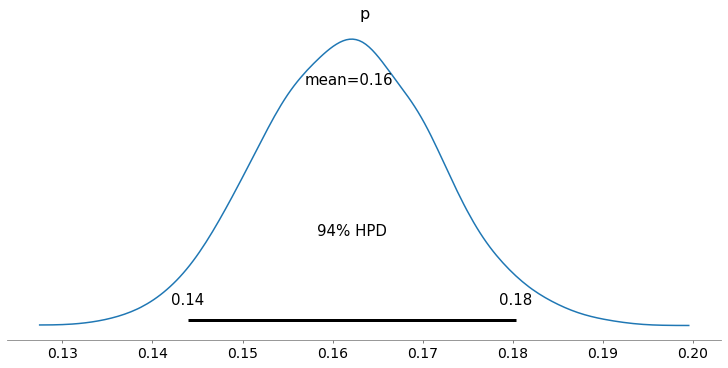

In [73]:
az.plot_posterior(trace);

## Como comparar casados e solteiros / divorciados?

In [ ]:
filter_married = rh['Married']
married = rh[filter_married]
married.head()

In [ ]:
available = rh[~filter_married]
available.head()

In [ ]:
with pm.Model() as model:
    p_available = pm.Uniform('p_available', 0, 1)
    p_married = pm.Uniform('p_married', 0, 1)

    delta = pm.Deterministic('delta', p_available - p_married)

    obs_available = pm.Bernoulli('obs_available', p_available, observed=available['Attrition'])
    obs_married = pm.Bernoulli('obs_married', p_married, observed=married['Attrition'])

    trace = pm.sample(5000, tune=1000)

In [ ]:
az.summary(trace)

In [ ]:
figsize(10, 8)
az.plot_posterior(trace, var_names=['p_married', 'p_available']);

In [ ]:
az.plot_posterior(trace, var_names=['delta']);

## Medida de interesse
Qual a probabilidade de pessoas casadas terem mais estabilidade?

In [ ]:
np.mean(trace['delta'] > 0)

Com probabilidade 0.9996, pessoas solteiras ou divorciadas pedem mais demissão.

In [ ]:
np.mean(trace['delta'] < 0)

## E se fizermos o mesmo para gênero?

In [ ]:
filter_female = rh['Female']
female = rh[filter_female]
female.head()

In [ ]:
male = rh[~filter_female]
male.head()

In [ ]:
with pm.Model() as model:
    p_female = pm.Uniform('p_female', 0, 1)
    p_male = pm.Uniform('p_male', 0, 1)

    delta = pm.Deterministic('delta', p_male - p_female)

    obs_female = pm.Bernoulli('obs_female', p_female, observed=female['Attrition'])
    obs_male = pm.Bernoulli('obs_male', p_male, observed=male['Attrition'])

    trace = pm.sample(5000, tune=1000)

In [ ]:
az.summary(trace)

In [ ]:
figsize(5, 5)
az.plot_posterior(trace, var_names=['p_female', 'p_male']);

In [ ]:
figsize(5, 5)
az.plot_posterior(trace, var_names=['delta']);

## Medida de interesse

In [ ]:
np.mean(trace['delta'] > 0)

Com probabilidade 0.866425, mulheres pedem mais demissão.

In [ ]:
np.mean(trace['delta'] < 0)

# Desafio
## Como podemos prever se alguém pedirá demissão?

*************

<img src="https://www.publicdomainpictures.net/download-picture.php?id=79857&check=5db7237139ee0bbb51bca6cdea3e9f51" width="500">

*************


# [Vamos rever os conceitos?](#Inferência-Bayesiana)

In [ ]:
rh.columns

In [ ]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('Attrition ~ Married + Female',
                            rh, family=pm.families.Binomial())
    trace = pm.sample(1000, tune=500, init='adapt_diag')

In [ ]:
az.summary(trace)

In [ ]:
figsize(5, 5)
az.plot_posterior(trace);

#### Como plotar nossa curva de decisão?

In [ ]:
trace.varnames

In [ ]:
from scipy.special import expit
figsize(10, 8)

lm = lambda x, sample: expit(sample['Intercept'] + \
                             sample['Married[T.True]'] * x + \
                             sample['Female[T.True]'])
pm.plot_posterior_predictive_glm(trace, lm=lm, label='Female', color='red', linewidth='1', alpha=0.5)

lm = lambda x, sample: expit(sample['Intercept'] + \
                             sample['Married[T.True]'] * x)
pm.plot_posterior_predictive_glm(trace, lm=lm, label='Male', color='green', linewidth='1', alpha=0.5)

plt.ylabel('Pr[Attrition]')
plt.xlabel('Married')
plt.legend()
plt.ylim((0, 1));

## Adicionando mais uma variável
### OverTime

In [ ]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('Attrition ~ Married + Female + OverTime',
                            rh, family=pm.families.Binomial())
    trace = pm.sample(2000, tune=1000, init='adapt_diag')

In [ ]:
az.summary(trace)

In [ ]:
az.plot_posterior(trace);

In [ ]:
from scipy.special import expit
figsize(10, 8)

lm = lambda x, sample: expit(sample['Intercept'] + \
                             sample['OverTime[T.True]'] * x + \
                             sample['Female[T.True]'])
pm.plot_posterior_predictive_glm(trace, lm=lm, label='Female', color='red', linewidth='1', alpha=0.5)

lm = lambda x, sample: expit(sample['Intercept'] + \
                             sample['OverTime[T.True]'] * x)
pm.plot_posterior_predictive_glm(trace, lm=lm, label='Male', color='green', linewidth='1', alpha=0.5)

plt.ylabel('Pr[Attrition]')
plt.xlabel('OverTime')
plt.legend()
plt.ylim((0, 1));

## Adicionando mais uma variável
### Age
Antes, vamos escalar a variável 'Age'

In [ ]:
rh['AgeNorm'] = (rh['Age'] - rh['Age'].min()) / (rh['Age'].max() - rh['Age'].min())
rh.head()

In [ ]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('Attrition ~ Married + Female + OverTime + AgeNorm',
                            rh, family=pm.families.Binomial())
    trace = pm.sample(5000, tune=1000, init='adapt_diag')

In [ ]:
az.summary(trace);

In [ ]:
az.plot_posterior(trace);

#### Quanto ser casado afeta a probabilidade de pedir demissão?

In [ ]:
az.plot_posterior(np.exp(trace['Married[T.True]']));

#### Quanto fazer hora extra afeta a probabilidade de pedir demissão?

In [ ]:
az.plot_posterior(np.exp(trace['OverTime[T.True]']));

### Como a idade afeta?

- Mulheres
- Casadas
- Hora Extra (sim / não)

In [ ]:
figsize(10, 8)
lm = lambda x, sample: expit(sample['Intercept'] + \
                             sample['Female[T.True]'] + \
                             sample['Married[T.True]'] + \
                             sample['OverTime[T.True]'] + \
                             sample['AgeNorm'] * x)
pm.plot_posterior_predictive_glm(trace, lm=lm, color='red', label='OverTime')

lm = lambda x, sample: expit(sample['Intercept'] + \
                             sample['Female[T.True]'] + \
                             sample['Married[T.True]'] + \
                             sample['AgeNorm'] * x)
pm.plot_posterior_predictive_glm(trace, lm=lm, color='green', label='No OverTime');

plt.ylabel('Pr[Attrition]')
plt.xlabel('Age (norm)')
plt.ylim((0, 1));
plt.legend()

### Como a idade afeta?

- Mulheres
- Solteiras ou Divorciadas
- Hora Extra (sim / não)

In [ ]:
figsize(10, 8)
lm = lambda x, sample: expit(sample['Intercept'] + \
                             sample['Female[T.True]'] + \
                             sample['OverTime[T.True]'] + \
                             sample['AgeNorm'] * x)
pm.plot_posterior_predictive_glm(trace, lm=lm, color='red', label='OverTime', linewidth=1, alpha=0.5)

lm = lambda x, sample: expit(sample['Intercept'] + \
                             sample['Female[T.True]'] + \
                             sample['AgeNorm'] * x)
pm.plot_posterior_predictive_glm(trace, lm=lm, color='green', label='No OverTime', linewidth=1, alpha=0.5)

plt.ylabel('Pr[Attrition]')
plt.xlabel('Age (norm)')
plt.ylim((0, 1));
plt.legend();

In [ ]:
b_intercept = trace['Intercept'].mean()
b_female = trace['Female[T.True]'].mean()
b_married = trace['Married[T.True]'].mean()
b_overtime = trace['OverTime[T.True]'].mean()
b_age_norm = trace['AgeNorm'].mean()

def attrition_prob(employee):
    return expit(b_intercept + \
                 employee['Female'] * b_female + \
                 employee['Married'] * b_married + \
                 employee['OverTime'] * b_overtime + \
                 employee['AgeNorm'] * b_age_norm)

In [ ]:
rh['attrition_prob'] = rh.apply(attrition_prob, axis=1)
rh.head()

In [ ]:
((rh['attrition_prob'] >= 0.5) == rh['Attrition']).mean()

# Exemplo
## Vídeo sob Demanda

In [ ]:
views_over_time = pd.read_csv('data/views_over_time.csv', index_col='date')
num_days = len(views_over_time)
views_over_time.head()

In [ ]:
figsize(15, 5)
views_over_time.plot(marker='o')

In [ ]:
with pm.Model() as model:
    alpha = 1.0 / views_over_time.views.mean()
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=num_days - 1)

In [ ]:
with model:
    idx = np.arange(num_days)
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [ ]:
az.summary(trace)

In [ ]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=views_over_time.views)

In [ ]:
with model:
    trace = pm.sample(10000, tune=5000)

In [ ]:
figsize(5, 5)
az.plot_posterior(trace);

In [ ]:
az.summary(trace)

In [ ]:
figsize(15, 5)
views_over_time.plot(marker='o')
plt.axvline(38, color='r');

# GP

In [ ]:
views_over_time_gp = pd.read_csv('data/views_over_time_gp.csv', index_col='date')
num_days = len(views_over_time_gp)
views_over_time_gp.head()

In [ ]:
figsize(15, 5)
views_over_time_gp.plot(marker='o')

In [ ]:
with pm.Model() as model:
    alpha = 1.0 / views_over_time_gp.views.mean()
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=num_days - 1)

    idx = np.arange(num_days)
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

    observation = pm.Poisson("obs", lambda_, observed=views_over_time_gp.views)
    trace = pm.sample(20000, tune=5000)

In [ ]:
figsize(5, 5)
az.plot_posterior(trace);

In [ ]:
az.summary(trace)

In [ ]:
tau_samples = pd.Series(trace['tau'])
change_points = tau_samples.value_counts(normalize=True)
change_points = change_points.sort_index()
change_points

In [ ]:
figsize(15, 5)
views_over_time_gp.plot(marker='o')
plt.ylabel('Number of views')
change_points.plot(kind='area', alpha=0.3, style='r', secondary_y=True)
plt.ylabel(r'Posterior of $\tau$')
plt.ylim((0, 0.6));

In [ ]:
from IPython.core.display import HTML


def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licença Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />O trabalho <span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">Notebook Small Data</span> de <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Gabriel Mendonça</span> está licenciado com uma Licença <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons - Atribuição-CompartilhaIgual 4.0 Internacional</a>.